In [69]:
pip install xgboost

   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   - -------------------------------------- 4.5/124.9 MB 26.9 MB/s eta 0:00:05
   -- ------------------------------------- 9.2/124.9 MB 23.8 MB/s eta 0:00:05
   ---- ----------------------------------- 14.7/124.9 MB 24.9 MB/s eta 0:00:05
   ------ --------------------------------- 19.4/124.9 MB 24.0 MB/s eta 0:00:05
   ------- -------------------------------- 24.6/124.9 MB 24.4 MB/s eta 0:00:05
   --------- ------------------------------ 29.4/124.9 MB 24.2 MB/s eta 0:00:04
   ----------- ---------------------------- 34.6/124.9 MB 24.1 MB/s eta 0:00:04
   ------------ --------------------------- 38.0/124.9 MB 23.2 MB/s eta 0:00:04
   -------------- ------------------------- 43.8/124.9 MB 23.6 MB/s eta 0:00:04
   --------------- ------------------------ 47.2/124.9 MB 23.1 MB/s eta 0:00:04
   ---------------- ----------------------- 53.0/124.9 MB 23.1 MB/s eta 0:00:04
   ------------------ --------------------- 59.2/12

In [70]:
import pandas as pd
import numpy as np
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import GradientBoostingRegressor
import xgboost as xgb
import matplotlib.pyplot as plt
import pandas as pd

# Load the dataset from the URL
url = "https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv"
df = pd.read_csv(url)

# Display the first few rows
print(df.head())


      crim    zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

        b  lstat  medv  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2  


In [95]:
df['target'] = np.log(df['medv'])
df

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv,target
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,3.178054
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,3.072693
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,3.546740
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,3.508556
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,3.589059
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4,3.109061
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6,3.025291
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9,3.173878
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0,3.091042


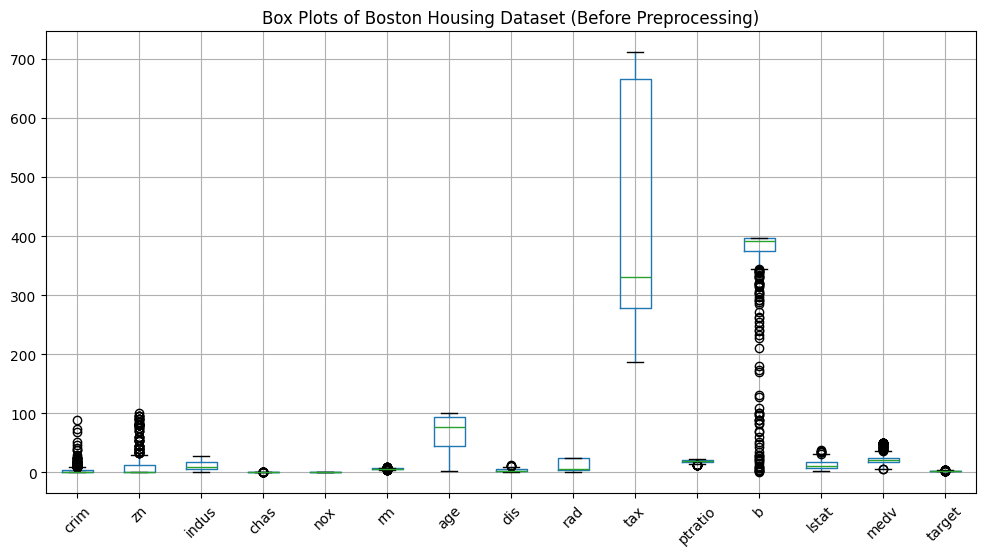

In [96]:
plt.figure(figsize=(12, 6))
df.boxplot(rot=45)
plt.title("Box Plots of Boston Housing Dataset (Before Preprocessing)")
plt.xticks(rotation=45)
plt.show()

In [74]:
X = df.drop(columns=['medv', 'target'])  # Drop the target variable
y = np.log(df['target'])  # Apply log transformation to the target

X = X.fillna(X.mean())

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

print(f"Training set: X_train shape = {X_train.shape}, y_train shape = {y_train.shape}")
print(f"Test set: X_test shape = {X_test.shape}, y_test shape = {y_test.shape}")

Training set: X_train shape = (404, 13), y_train shape = (404,)
Test set: X_test shape = (102, 13), y_test shape = (102,)


In [75]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Random Forest Mean Squared Error (MSE): {mse}")
print(f"Random Forest R-squared: {r2}")

Random Forest Mean Squared Error (MSE): 0.0036311003784512924
Random Forest R-squared: 0.8177106028218677


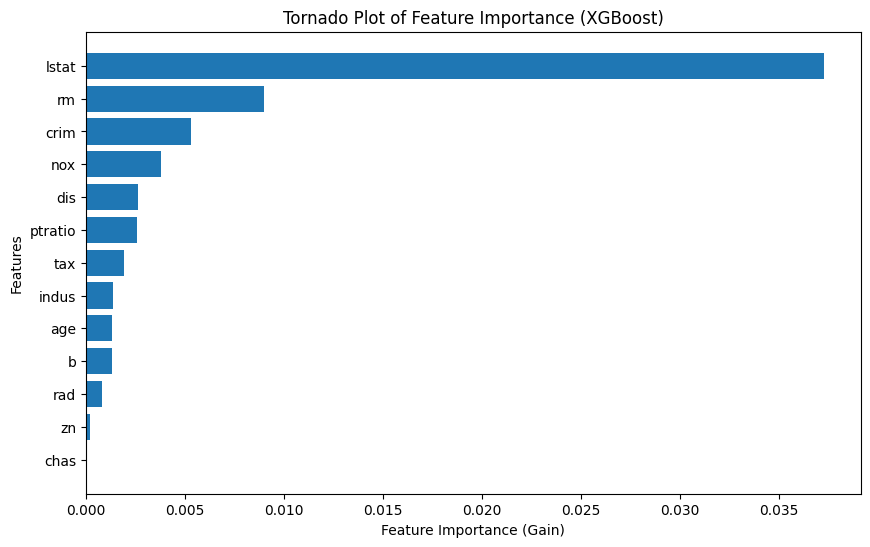

In [106]:

model = xgb.XGBRegressor()
model.fit(X_train, y_train)

importance = model.get_booster().get_score(importance_type='gain')
importance_dict = {}
for i in range(len(df.columns)-2):
    importance_dict[f'{df.columns[i]}'] = importance[f'f{i}']
importance_df = pd.DataFrame(importance_dict.items(), columns=['Feature', 'Importance'])
importance_df = importance_df.sort_values(by="Importance", ascending=True)

plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel("Feature Importance (Gain)")
plt.ylabel("Features")
plt.title("Tornado Plot of Feature Importance (XGBoost)")
plt.show()


In [145]:
df_chosen = df[['lstat', 'target', 'rm', 'crim', 'nox', 'dis']]

In [146]:
X = df_chosen.drop(columns=['target'])  # Drop the target variable
y = np.log(df_chosen['target'])  # Apply log transformation to the target

X = X.fillna(X.mean())

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

print(f"Training set: X_train shape = {X_train.shape}, y_train shape = {y_train.shape}")
print(f"Test set: X_test shape = {X_test.shape}, y_test shape = {y_test.shape}")

Training set: X_train shape = (404, 5), y_train shape = (404,)
Test set: X_test shape = (102, 5), y_test shape = (102,)


In [147]:
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
gb_model.fit(X_train, y_train)

# Predictions
y_pred = gb_model.predict(X_test)

# Evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print results
print(f"Random Forest Mean Squared Error (MSE): {mse}")
print(f"Random Forest R-squared: {r2}")

Random Forest Mean Squared Error (MSE): 0.0030370258557751288
Random Forest R-squared: 0.8475344785979797
